# Ensemble Learning


## Importing libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import itertools

## Load Dataset:

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Check missing values:

In [ ]:
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


## Handle missing values :

In [ ]:
df.fillna(df.mean(), inplace=True)
print("\nMissing values after handling:")
print(df.isnull().sum())



Missing values after handling:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


## Preprocessing :

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

## Bagging Implementation :

In [ ]:
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
bagging_probs = bagging_clf.predict_proba(X_test)[:, 1]
bagging_pred = bagging_clf.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)
print(f'Bagging Classifier Accuracy: {bagging_acc*100:.2f}%')

Bagging Classifier Accuracy: 93.86%


# Boosting Implementation :

## Implementing AdaBoost,

In [ ]:
adaboost_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_clf.fit(X_train, y_train)
adaboost_probs = adaboost_clf.predict_proba(X_test)[:, 1]
adaboost_pred = adaboost_clf.predict(X_test)
adaboost_acc = accuracy_score(y_test, adaboost_pred)
print(f'AdaBoost Classifier Accuracy: {adaboost_acc*100:.2f}%')

AdaBoost Classifier Accuracy: 95.61%


## Implementing Gradient Boosting,

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_clf.fit(X_train, y_train)
gb_probs = gb_clf.predict_proba(X_test)[:, 1]
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print(f'GradientBoosting Classifier Accuracy: {gb_acc*100:.2f}%')

GradientBoosting Classifier Accuracy: 94.74%


## Implementing XGBoost,

In [ ]:
xgb_clf = XGBClassifier(n_estimators=50, eval_metric='logloss',
                        random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_probs = xgb_clf.predict_proba(X_test)[:, 1]
xgb_pred = xgb_clf.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f'XGB Classifier Accuracy: {xgb_acc*100:.2f}%')

XGB Classifier Accuracy: 94.74%


## Stacking Implentation:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
base_models = [
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]
meta_model = LogisticRegression()
stacking_clf = StackingClassifier(estimators=base_models,
                                  final_estimator=meta_model, passthrough=True)
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
stacking_acc = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Accuracy: {stacking_acc*100:.2f}%")

Stacking Accuracy: 96.49%
 


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Performance:

In [ ]:
results = pd.DataFrame({
    'Model': ['Bagging', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'Stacking'],
    'Accuracy': [bagging_acc, adaboost_acc, gb_acc, xgb_acc, stacking_acc]
})
results

,Model,Accuracy
0,Bagging,0.938596
1,AdaBoost,0.956140
2,Gradient Boosting,0.947368
3,XGBoost,0.947368
4,Stacking,0.964912


# Visualization:

## Bar chart:

<ipython-input-60-56b4f8b5d5c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


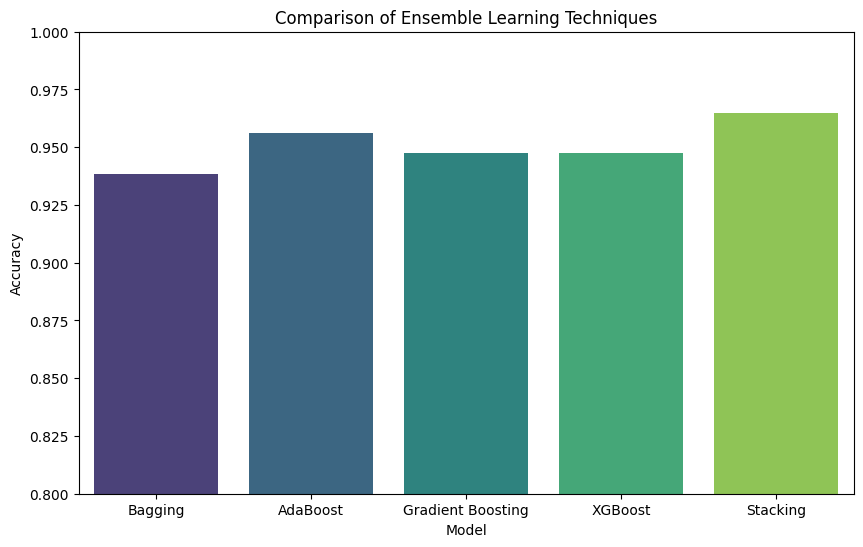

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.title('Comparison of Ensemble Learning Techniques')
plt.ylim(0.8, 1)
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Boxplot:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


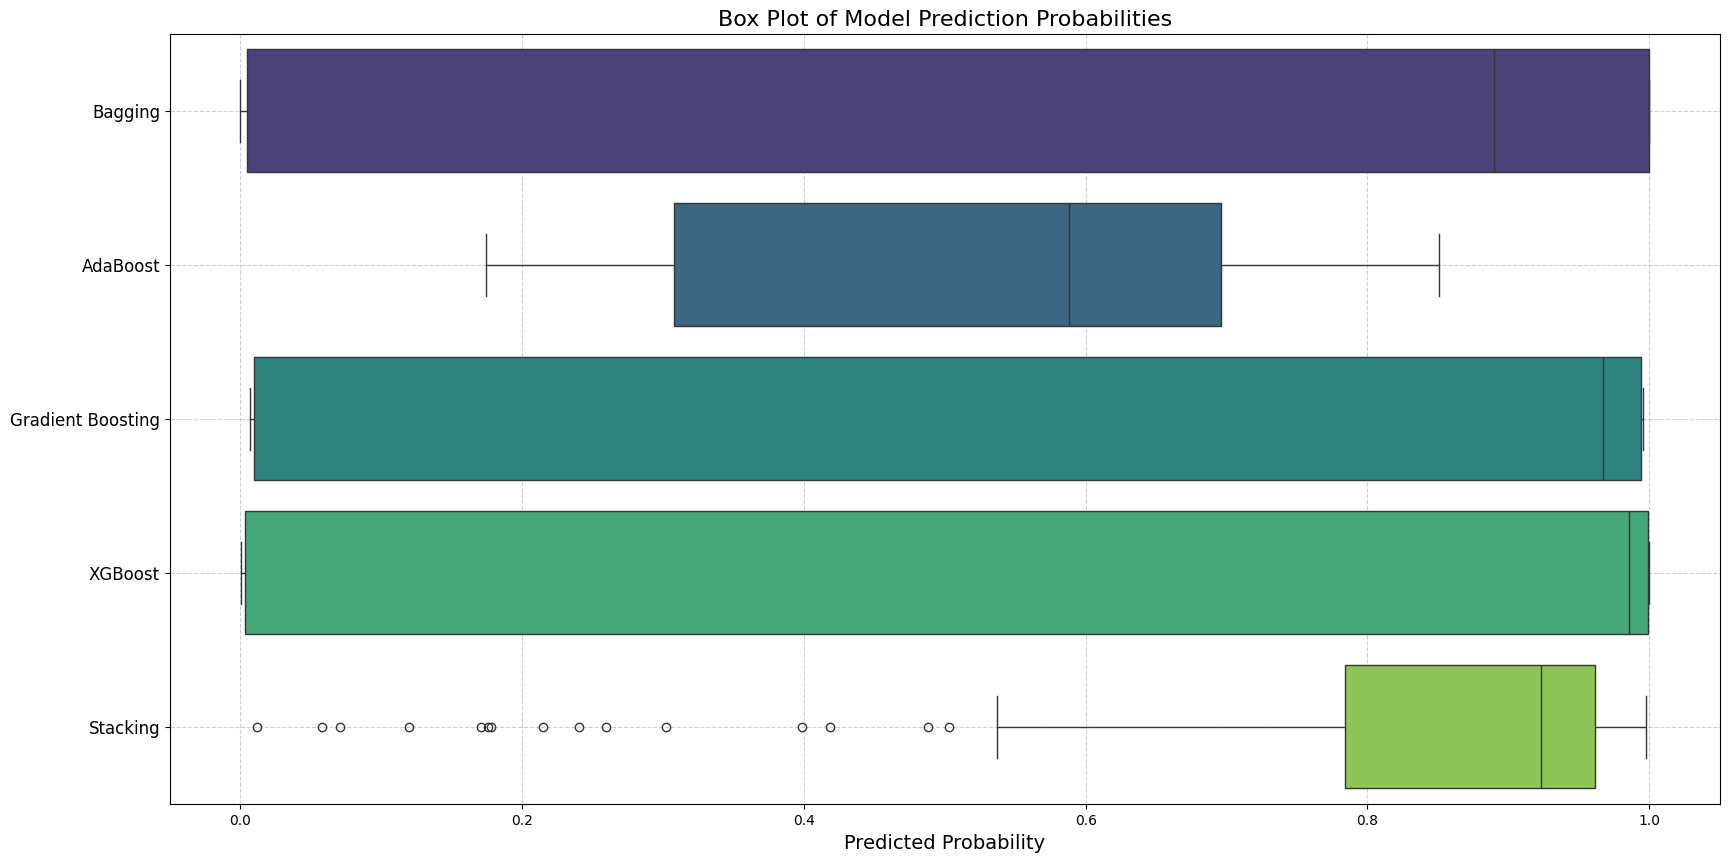

In [ ]:
plt.figure(figsize=(20,10))
stacking_probs = stacking_clf.predict_proba(X_test_scaled)[:, 1]
sns.boxplot(data=[bagging_probs, adaboost_probs,gb_probs, xgb_probs,
                  stacking_probs], orient='h', palette='viridis')
plt.yticks(range(5), ['Bagging', 'AdaBoost', 'Gradient Boosting',
                      'XGBoost', 'Stacking'], fontsize=12)
plt.xlabel('Predicted Probability', fontsize=14)
plt.title('Box Plot of Model Prediction Probabilities', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Confusion Matrix:

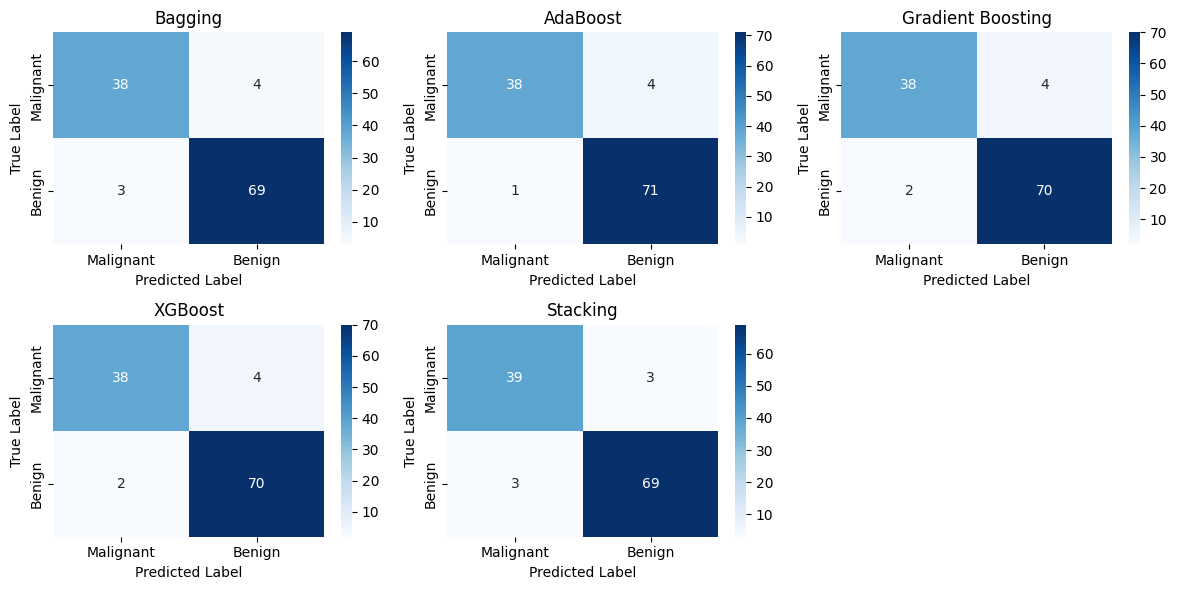

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'],
                yticklabels=['Malignant', 'Benign'], ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(f'{model_name}')

models = [('Bagging', bagging_pred), ('AdaBoost', adaboost_pred),
          ('Gradient Boosting', gb_pred), ('XGBoost', xgb_pred), ('Stacking', stacking_pred)]

fig, axes = plt.subplots(2,3, figsize=(12, 6))
for i in range(len(models), 6):
    fig.delaxes(axes.flat[i])
for ax, (model_name, pred) in zip(axes.flat, models):
    plot_confusion_matrix(y_test, pred, model_name, ax)

plt.tight_layout()
plt.show()